<a href="https://colab.research.google.com/github/Dee-M123/DM-Project1-Portfolio-HR-Analytics/blob/main/Notebooks/analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
sns.set(style="whitegrid")
%matplotlib inline

In [68]:
import sys
print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/Dee-M123/DM-Project1-Portfolio-HR-Analytics/refs/heads/main/Data/Cleaned%20Dataset/cleaned_employees_dataset.csv")


df.head()

,employee_id,department,region,region_grouped,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,is_new_hire,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,region_26,Bachelors,Male,sourcing,1,24,0.0,1,1,1,0,77
1,74430,HR,region_4,region_4,Bachelors,Female,other,1,31,3.0,0,5,0,0,51
2,72255,Sales & Marketing,region_13,region_13,Bachelors,Male,other,1,31,1.0,0,4,0,0,47
3,38562,Procurement,region_2,region_2,Bachelors,Female,other,3,31,2.0,0,9,0,0,65
4,64486,Finance,region_29,Other,Bachelors,Male,sourcing,1,30,4.0,0,7,0,0,61


In [50]:
df.tail(3)

,employee_id,department,region,region_grouped,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,is_new_hire,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
17412,64573,Technology,region_7,region_7,Bachelors,Female,referred,2,30,5.0,0,6,1,0,81
17413,49584,HR,region_7,region_7,Bachelors,Male,other,1,33,1.0,0,9,0,0,51
17414,64573,HR,region_7,region_7,Bachelors,Female,referred,1,35,5.0,0,4,1,0,81


**Overview of clear performance indicators**

looking at the general average people that get awards and meet KPIs

In [51]:
print("KPI success rate :", df["KPIs_met_more_than_80"].mean())
print("Award rate :", df["awards_won"].mean())

KPI success rate : 0.35888601780074647
Award rate : 0.02337065747918461


In [52]:
print("New hire proportion:", df["is_new_hire"].mean())

New hire proportion: 0.0782658627619868


In [53]:
display(df.describe()[["no_of_trainings","avg_training_score","length_of_service","age"]].T)

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,17415.0,1.250761,0.595720,1.0,1.0,1.0,1.0,9.0
avg_training_score,17415.0,63.177720,13.418314,39.0,51.0,60.0,75.0,99.0
length_of_service,17415.0,5.801493,4.175632,1.0,3.0,5.0,7.0,34.0
age,17415.0,34.807982,7.694464,20.0,29.0,33.0,39.0,60.0


**Hypothesis 1:**

Employees who attend more trainings have higher average training scores.


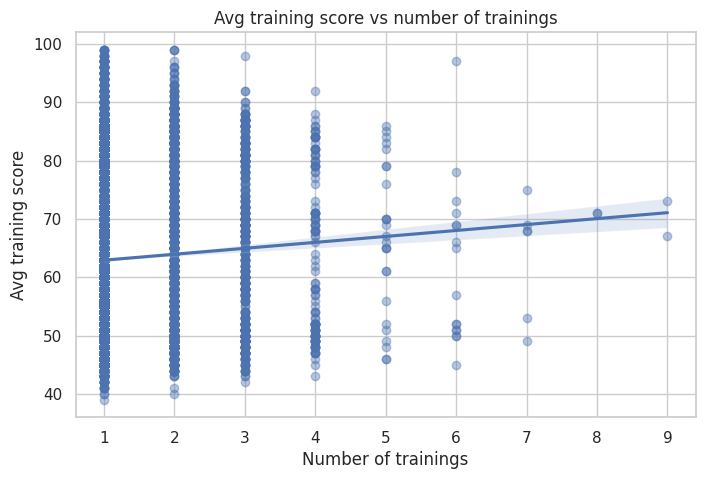

In [54]:
plt.figure(figsize=(8,5))
sns.regplot(data=df, x="no_of_trainings", y="avg_training_score", scatter_kws={"alpha":0.4})
plt.title("Avg training score vs number of trainings")
plt.xlabel("Number of trainings")
plt.ylabel("Avg training score")
plt.show()

# There is a weak postive correlation, between training scores and number of training, however there is a high variance with each training count, hence not significant

In [55]:
#capping to see if people with 5 and over trainings display something supporting the first hypothesis, over those with less trainings:

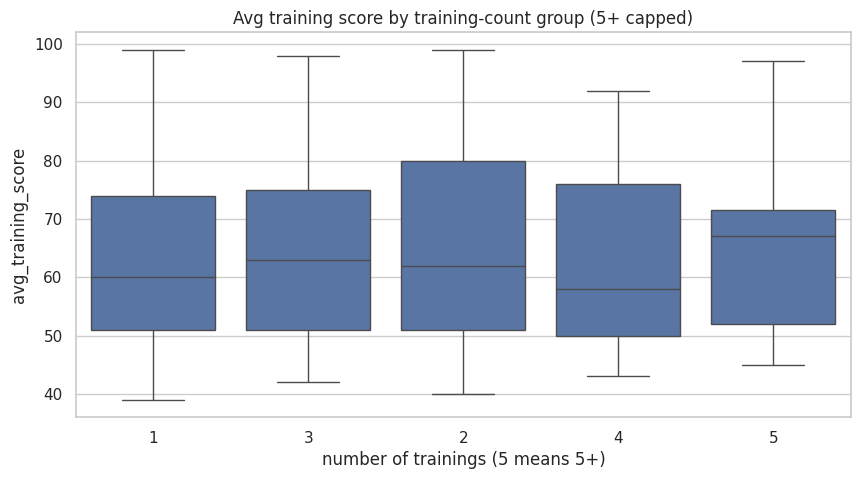

In [56]:
df['train_grp'] = df['no_of_trainings'].clip(upper=5).astype(str)  # groups 0..5 (5 means 5+)
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='train_grp', y='avg_training_score')
plt.title("Avg training score by training-count group (5+ capped)")
plt.xlabel("number of trainings (5 means 5+)")
plt.show()

#Graph show that the number of trainings does not mean higher scores

**Hypothesis 2:**

Employees who met KPIs (> 80%) in the past year will have higher number of average trainings.

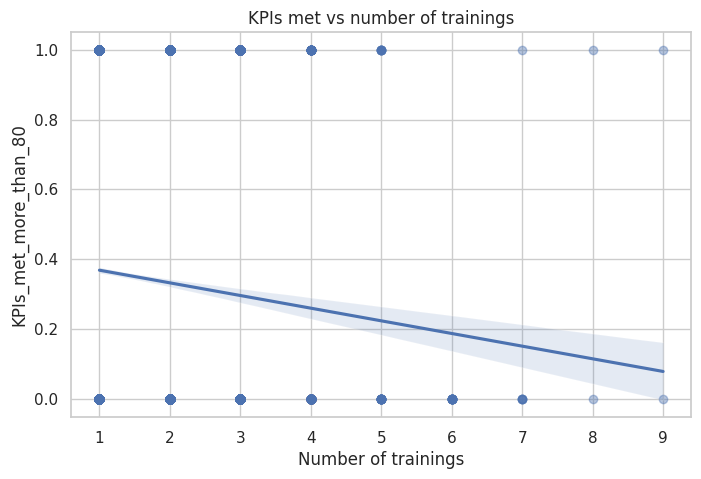

In [57]:
plt.figure(figsize=(8,5))
sns.regplot(data=df, x="no_of_trainings", y="KPIs_met_more_than_80", scatter_kws={"alpha":0.4})
plt.title("KPIs met vs number of trainings")
plt.xlabel("Number of trainings")
plt.ylabel("KPIs_met_more_than_80")
plt.show()

#negative relationship between number of trainings and KPIs

In [58]:
import statsmodels.api as sm
X = sm.add_constant(df["no_of_trainings"])
y = df["KPIs_met_more_than_80"]
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

#the p value shows statistical significance of findings and negative coef lets us know it less likely for someone with more training to meet their KPIs

Optimization terminated successfully.
         Current function value: 0.651721
         Iterations 5
                             Logit Regression Results                            
Dep. Variable:     KPIs_met_more_than_80   No. Observations:                17415
Model:                             Logit   Df Residuals:                    17413
Method:                              MLE   Df Model:                            1
Date:                   Thu, 04 Dec 2025   Pseudo R-squ.:                0.001614
Time:                           18:20:21   Log-Likelihood:                -11350.
converged:                          True   LL-Null:                       -11368.
Covariance Type:               nonrobust   LLR p-value:                 1.375e-09
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3725      0.038     -9.740      0.000      -0.448   

**Hypothesis 3:**

New hires have lower KPI achievement rates than tenured employees.


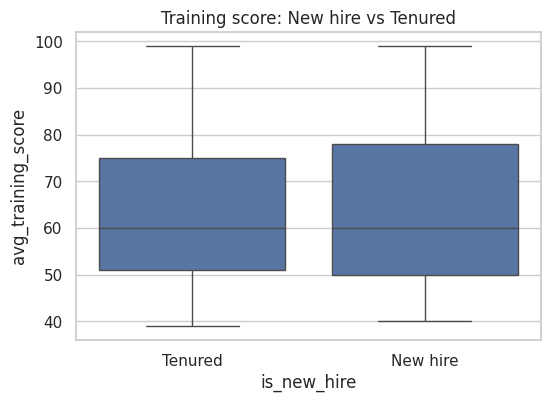

In [59]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="is_new_hire", y="avg_training_score")
plt.xticks([0,1], ["Tenured","New hire"])
plt.title("Training score: New hire vs Tenured")
plt.show()

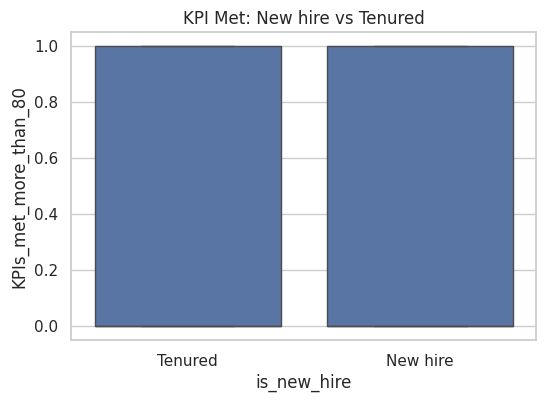

In [60]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="is_new_hire", y="KPIs_met_more_than_80")
plt.xticks([0,1], ["Tenured","New hire"])
plt.title("KPI Met: New hire vs Tenured")
plt.show()

In [61]:
# Group KPI by new-hire category
kpi_by_new = df.groupby("is_new_hire")["KPIs_met_more_than_80"].agg(['sum', 'count'])


In [62]:
# testing for significance
counts = kpi_by_new['sum'].values      # number of successes (KPI met)
nobs = kpi_by_new['count'].values      # total observations per group

# Z-test for two proportions
stat, pval = proportions_ztest(counts, nobs)

stat, pval

# A p-value of 0.6448 (is very high), this means you do NOT have evidence of a statistically significant difference between the two groups, if both groups had similiar proportions


(np.float64(-0.461029189284009), np.float64(0.6447776633880211))

**Hypothesis 4:**

Employees in larger departments have a higher number of   trainings.


In [63]:
dept_stats = df.groupby("department").agg(
    dept_size = ("employee_id","count"),
    avg_trainings = ("no_of_trainings","mean"),
    avg_training_score = ("avg_training_score","mean"),
    kpi_rate = ("KPIs_met_more_than_80","mean"),
    award_rate = ("awards_won","mean")
).reset_index().sort_values("dept_size", ascending=False)

display(dept_stats)

,department,dept_size,avg_trainings,avg_training_score,kpi_rate,award_rate
7,Sales & Marketing,5458,1.264749,50.056614,0.277208,0.021986
4,Operations,3524,1.169410,60.351589,0.440692,0.025255
5,Procurement,2240,1.336161,70.180357,0.373214,0.025446
8,Technology,2199,1.246021,79.847658,0.356071,0.026376
0,Analytics,1697,1.344137,84.565115,0.400118,0.025339
2,HR,831,1.073406,50.386282,0.361011,0.016847
1,Finance,802,1.320449,60.326683,0.397756,0.018703
3,Legal,332,1.069277,59.533133,0.355422,0.018072
6,R&D,332,1.319277,84.451807,0.448795,0.015060


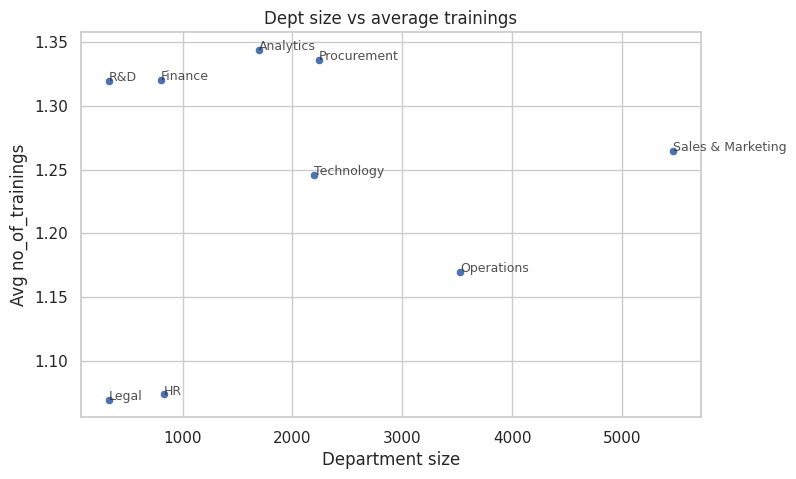

In [64]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=dept_stats, x="dept_size", y="avg_trainings")
for i, r in dept_stats.iterrows():
    plt.text(r["dept_size"], r["avg_trainings"], r["department"], fontsize=9, alpha=0.8)
plt.xlabel("Department size")
plt.ylabel("Avg no_of_trainings")
plt.title("Dept size vs average trainings")
plt.show()

# very weak correlation, but does slightly favour the notion

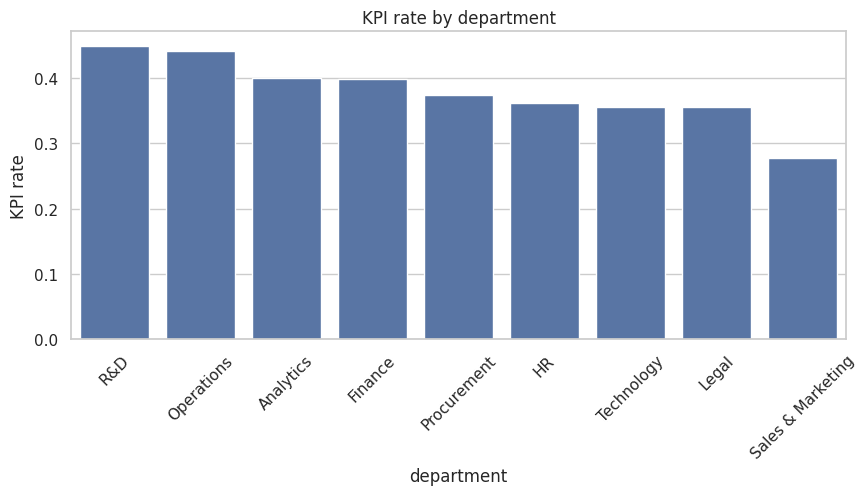

In [65]:
plt.figure(figsize=(10,4))
sns.barplot(data=dept_stats.sort_values("kpi_rate", ascending=False), x="department", y="kpi_rate")
plt.xticks(rotation=45); plt.title("KPI rate by department"); plt.ylabel("KPI rate")
plt.show()

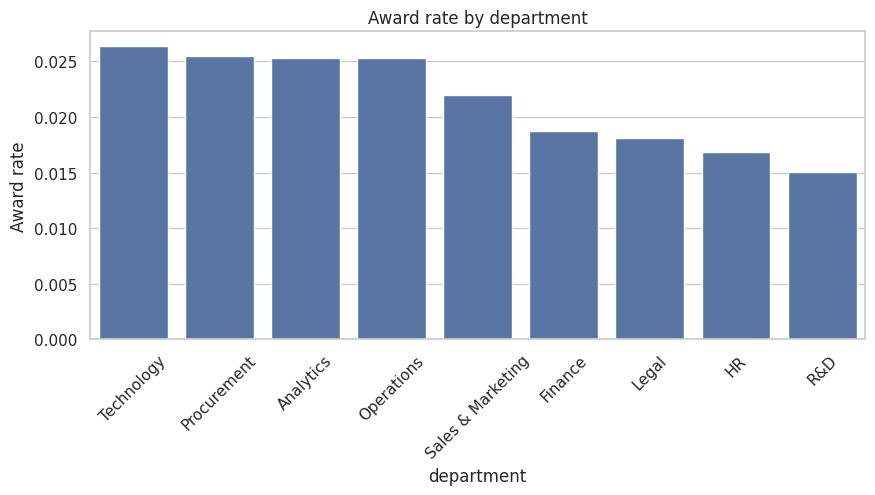

In [66]:
plt.figure(figsize=(10,4))
sns.barplot(data=dept_stats.sort_values("award_rate", ascending=False), x="department", y="award_rate")
plt.xticks(rotation=45); plt.title("Award rate by department"); plt.ylabel("Award rate")
plt.show()

In [67]:
dept_stats.to_csv("dept_stats_summary.csv", index=False)
print("Saved dept_stats_summary.csv")

Saved dept_stats_summary.csv
